<a href="https://colab.research.google.com/github/drvoss/Colab-Notebooks/blob/master/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*] train images shape :  (60000, 28, 28)
[*] test images shape :  (10000, 28, 28)
[*] train labels shape :  (60000,)
[*] test labels shape :  (10000,)
[*] Train Data Set


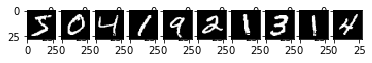

[5 0 4 1 9 2 1 3 1 4]
[*] Test Data Set


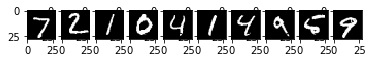

[7 2 1 0 4 1 4 9 5 9]
[*] train images shape after prework :  (60000, 784)
[*] test images shape after prework :  (10000, 784)
[*] train labels shape after categorical :  (60000, 10)
[*] test labels shape after categorical :  (10000, 10)
[*] fitting start
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 18us/sample - loss: 1.7496 - acc: 0.4224 - val_loss: 1.0321 - val_acc: 0.8245
Epoch 2/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.9662 - acc: 0.7261 - val_loss: 0.6077 - val_acc: 0.8783
Epoch 3/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.6887 - acc: 0.8107 - val_loss: 0.4536 - val_acc: 0.8972
Epoch 4/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.5599 - acc: 0.8481 - val_loss: 0.3816 - val_acc: 0.9041
Epoch 5/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.4913 - acc: 0.8660 - val_loss: 0.3378 - val_acc: 0.9132

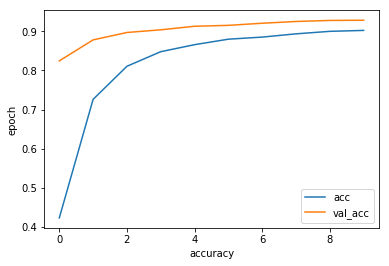

[*] evaluation
10000/10000 [==============================] - 1s 86us/sample - loss: 0.2537 - acc: 0.9291
loss : 25.4%
accuracy : 92.9%
[*] evaluation test


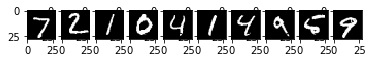

labels :  [7 2 1 0 4 1 4 9 5 9]
predic :  [7 2 1 0 4 1 4 9 6 9]


In [13]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline

#텐서플로에 포함된 MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#ndarray이 shape로 배열의 차원수를 확인한다
print('[*] train images shape : ', train_images.shape) # (60000, 28, 28) : 60000x28x28의 3차원 배열
print('[*] test images shape : ', test_images.shape)
print('[*] train labels shape : ', train_labels.shape) # (60000,) : 1차원 배열
print('[*] test labels shape : ', test_labels.shape)

#train dataset 출력
print('[*] Train Data Set')
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_images[i], 'gray')
plt.show()
print(train_labels[0:10])

#test dataset 출력
print('[*] Test Data Set')
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(test_images[i], 'gray')
plt.show()
print(test_labels[0:10])

# 데이터셋을 뉴럴 네트워크에 적합한 형태로 전환하는 전처리 작업
train_images = train_images.reshape((train_images.shape[0], 28*28))
test_images = test_images.reshape((test_images.shape[0], 28*28))
print('[*] train images shape after prework : ', train_images.shape)
print('[*] test images shape after prework : ', test_images.shape)

# 라벨을 one-hot 표현으로 변환, 카테고리화 # 2 -> 001000000
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('[*] train labels shape after categorical : ', train_labels.shape)
print('[*] test labels shape after categorical : ', test_labels.shape)

# 모델 생성
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784, ))) # 입력레이어
model.add(Dense(128, activation='sigmoid')) # 히든레이어
model.add(Dropout(rate=0.5)) # 드롭아웃
model.add(Dense(10, activation='softmax')) # 출력레이어

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

# 학습
print('[*] fitting start')
history = model.fit(train_images
                    , train_labels
                    , batch_size=500 # 훈련시킬 단위, 클수록 학습속도가 빠르나 메모리 소비량 증가
                    , epochs=10 # 이폭수, 훈련데이터를 전부 사용하면 1이폭
                    , validation_split=0.2) #훈련데이터 중 검증데이터로 사용할 비율
                                            #훈련 데이터의 일부를 훈련에 이용하지 않음
print('[*] fitting end')

# 학습 내용을 그래프를 이용하여 표시
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(loc='best')
plt.show()

# 평가
print('[*] evaluation')
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss : {:.1f}%\naccuracy : {:.1f}%'.format(test_loss*100, test_acc*100))

# 첫번재 10개의 데이터를 이용해 테스트 이미지 추론
print('[*] evaluation test')
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(test_images[i].reshape(28, 28), 'gray')
plt.show()
test_predictions = model.predict(test_images[0:10])
print('labels : ', argmax(test_labels[0:10], axis=1))
print('predic : ', argmax(test_predictions, axis=1))